In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(5, 3))
import math

C:\Users\Maxmilite\AppData\Local\Temp\ipykernel_5104\3589825282.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<Figure size 500x300 with 0 Axes>

第一章作业上机实验

In [3]:
alpha, beta = -1e9, -1
a, b, c = 1, alpha + beta, 1e9

x1, x2 = (-2 * c) / (b + (b ** 2 - 4 * a * c) ** 0.5) \
       , (-2 * c) / (b - (b ** 2 - 4 * a * c) ** 0.5)

print(x1, x2)

1000000000.0 1.0


In [4]:
def fpow(x: float, y: int) -> float:
    res: float = 1
    while y:
        if y & 1:
            res *= x
        x *= x
        y >>= 1
    return res

x, y = 42, 31
print(fpow(x, y))

209280132851277227501988209234026802122409700753408


第二章作业上机实验

$x_{k + 1} = 15 - x_k^2, k = 0, 1, 2, \cdots$，$x_0 = 2$

In [5]:
lim = 100
x = [2]
for i in range(lim):
    # x.append(15 - (x[-1] ** 2))
    pass

$x_{k + 1} = \cfrac{15}{2x_k + 1}, k = 0, 1, 2, \cdots$，$x_0 = 2$

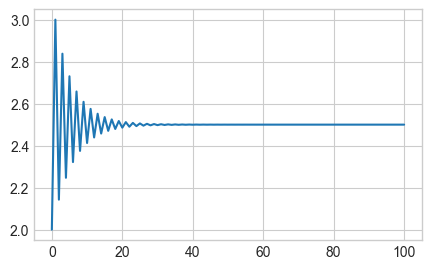

In [6]:
lim = 100
x = [2]
for i in range(lim):
    x.append(15 / (2 * x[-1] + 1))

plt.figure(figsize=(5, 3))
plt.plot(x)

$x_{k + 1} = x_k - \cfrac{2x_k^2 + x_k - 15}{4x_k + 1}, k = 0, 1, 2, \cdots$，$x_0 = 2$

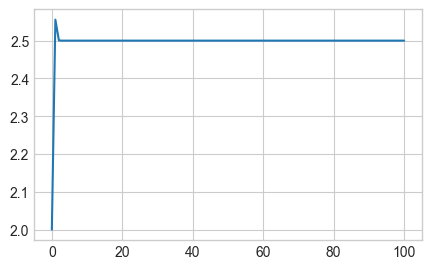

In [7]:
lim = 100
x = [2]
for i in range(lim):
    x.append(x[-1] - (2 * x[-1] ** 2 + x[-1] - 15) / (4 * x[-1] + 1))

plt.figure(figsize=(5, 3))
plt.plot(x)

证明方程 $2 - 3x - \sin x = 0$ 在 $(0, 1)$ 内有且仅有一个实根。使用二分法求误差不大于 $0.0005$ 的根，及需要的迭代次数。

In [8]:
def f(x: float) -> float:
    return 2 - 3 * x - math.sin(x)

TOL = 0.0005
l, r = 0, 1
cnt = 0
while (r - l) > TOL:
    cnt += 1
    x = (l + r) / 2
    if f(x) > 0:
        l = x
    else:
        r = x

print(x, cnt, f(x))

0.50537109375 11 -0.0002454600314260591


利用牛顿法求解方程 $ \cfrac 12 + \cfrac 14 x^2 - x \sin x - \cfrac 12 \cos 2x = 0$，分别取 $x_0 = \cfrac \pi 2, 5 \pi, 10 \pi$ 使得精度不小于 $10^{-5}$。比较初值对计算结果的影响。

In [9]:
def f(x: float) -> float:
    return 0.5 + 0.25 * x ** 2 - x * math.sin(x) - 0.5 * math.cos(2 * x)

def df(x: float) -> float:
    return 0.5 * x - math.sin(x) - x * math.cos(x) + math.sin(2 * x)

def newton(x0: float) -> float:
    TOL = 1e-5
    cnt = 0
    while True:
        cnt += 1
        x = x0 - f(x0) / df(x0)
        if abs(x - x0) < TOL:
            break
        x0 = x
    return x, cnt

x0s = [math.pi / 2, 5 * math.pi, 10 * math.pi]
for x0 in x0s:
    res, cnt = newton(x0)
    print(f'x0 = {x0}, res = {res}, cnt = {cnt}')

x0 = 1.5707963267948966, res = 1.8954884189769137, cnt = 15
x0 = 15.707963267948966, res = 1.8954890013731998, cnt = 19
x0 = 31.41592653589793, res = 1.8955029706849522, cnt = 428


已知 $f(x) = 5x - e^x$ 在 $(0, 1)$ 之间有一个实根，试分别利用二分法、牛顿法、割线法、错位法设计相关的计算格式，并编程求解。精确到四位小数。

In [10]:
def f(x: float) -> float:
    return 5 * x - math.exp(x)

def df(x: float) -> float:
    return 5 - math.exp(x)

def bisection(l: float, r: float) -> float:
    TOL = 1e-4
    cnt = 0
    while (r - l) > TOL:
        cnt += 1
        x = (l + r) / 2
        if f(x) > 0:
            l = x
        else:
            r = x
    return x, cnt

def newton(x0: float) -> float:
    TOL = 1e-4
    cnt = 0
    while True:
        cnt += 1
        x = x0 - f(x0) / df(x0)
        if abs(x - x0) < TOL:
            break
        x0 = x
    return x, cnt

def secant(x0: float, x1: float) -> float:
    TOL = 1e-4
    cnt = 0
    while True:
        cnt += 1
        x = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x - x1) < TOL:
            break
        x0, x1 = x1, x
    return x, cnt

def regula_falsi(x0: float, x1: float) -> float:
    TOL = 1e-4
    cnt = 0
    while True:
        cnt += 1
        x = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        if abs(x - x1) < TOL:
            break
        if f(x) * f(x1) < 0:
            x0 = x
        else:
            x1 = x
    return x, cnt

l, r = 0, 1
res, cnt = bisection(l, r)
print(f'bisection: res = {res}, cnt = {cnt}')

x0 = 0.5
res, cnt = newton(x0)
print(f'newton: res = {res}, cnt = {cnt}')

x0, x1 = 0, 1
res, cnt = secant(x0, x1)
print(f'secant: res = {res}, cnt = {cnt}')

x0, x1 = 0, 1
res, cnt = regula_falsi(x0, x1)
print(f'regula_falsi: res = {res}, cnt = {cnt}')

bisection: res = 0.99993896484375, cnt = 14
newton: res = 0.25917110166149104, cnt = 3
secant: res = 0.2591712288816814, cnt = 4
regula_falsi: res = 0.25917408510579704, cnt = 4


第三章作业上机实验

以 $y = \sin(x)$ 为例，在 $[0,π]$ 区间内生成 $11$ 个、$21$ 个数据点，设计算法或程序，用上述 $4$ 个边界条件，分别计算其样条插值，并作图比较，分析其差异性。

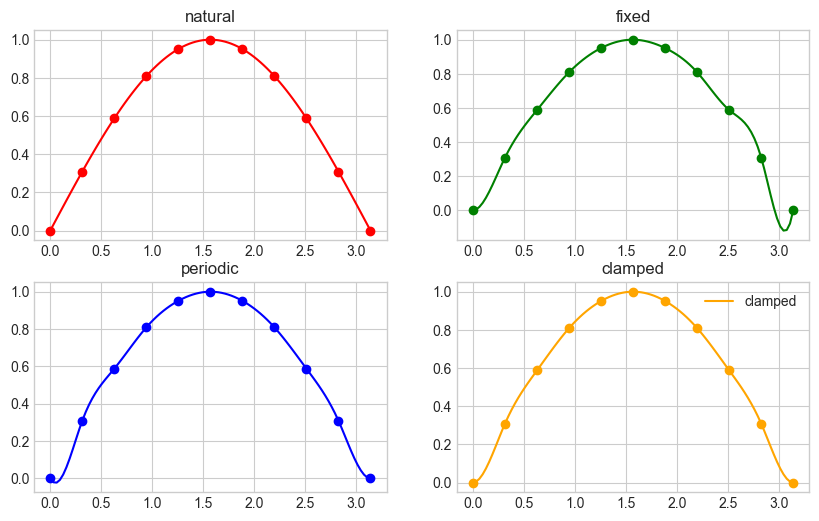

In [28]:
def f(x: float) -> float:
    return math.sin(x)

X = np.linspace(0, math.pi, 11)
Y = [f(x) for x in X]

# 自然边界
def natural_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 1
    A[n][n] = 1
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = natural_cubic_spline(X, Y)

x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_natural, y_natural = x, y

# 固定边界
def fixed_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * f0
    B[n] = 3 * fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = fixed_cubic_spline(X, Y, 0, math.pi)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_fixed, y_fixed = x, y

# 周期边界
def periodic_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    B[n] = 3 * (Y[0] - Y[n]) / (X[0] - X[n]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = periodic_cubic_spline(X, Y)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_periodic, y_periodic = x, y

# 强制第一个子区间和第二个子区间样条多项式的三阶导数相同，倒数第二个子区间和最后一个子区间的三次样条函数的三阶导数相等
def clamped_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - f0
    B[n] = fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = clamped_cubic_spline(X, Y, 0, 0)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_clamped, y_clamped = x, y

# 绘制一个四个图 2 * 2 排布的子图
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1, title='natural')
plt.plot(x_natural, y_natural, label='natural', color='red')
plt.scatter(X, Y, color='red')
plt.subplot(2, 2, 2, title='fixed')
plt.plot(x_fixed, y_fixed, label='fixed', color='green')
plt.scatter(X, Y, color='green')
plt.subplot(2, 2, 3, title='periodic')
plt.plot(x_periodic, y_periodic, label='periodic', color='blue')
plt.scatter(X, Y, color='blue')
plt.subplot(2, 2, 4, title='clamped')
plt.plot(x_clamped, y_clamped, label='clamped', color='orange')
plt.scatter(X, Y, color='orange')

plt.legend()
plt.show()

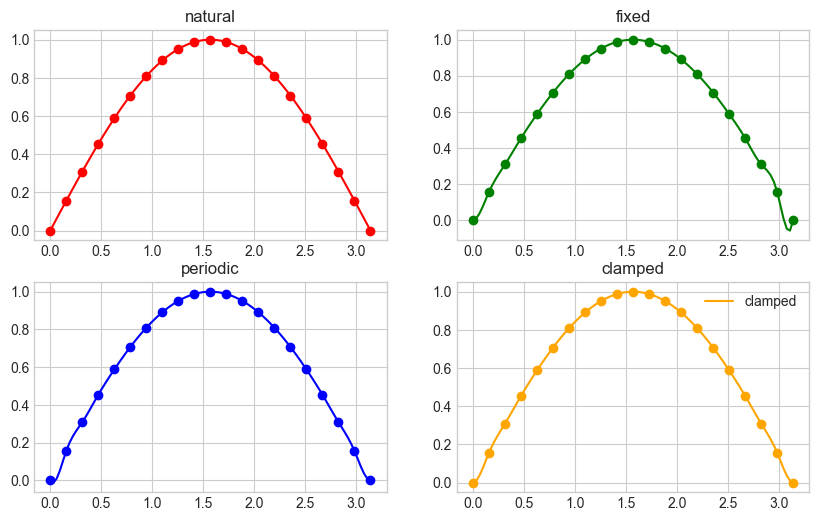

In [29]:
def f(x: float) -> float:
    return math.sin(x)

X = np.linspace(0, math.pi, 21)
Y = [f(x) for x in X]

# 自然边界
def natural_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 1
    A[n][n] = 1
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = natural_cubic_spline(X, Y)

x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_natural, y_natural = x, y

# 固定边界
def fixed_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * f0
    B[n] = 3 * fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = fixed_cubic_spline(X, Y, 0, math.pi)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_fixed, y_fixed = x, y

# 周期边界
def periodic_cubic_spline(X: np.ndarray, Y: np.ndarray) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    B[n] = 3 * (Y[0] - Y[n]) / (X[0] - X[n]) - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = periodic_cubic_spline(X, Y)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_periodic, y_periodic = x, y

# 强制第一个子区间和第二个子区间样条多项式的三阶导数相同，倒数第二个子区间和最后一个子区间的三次样条函数的三阶导数相等
def clamped_cubic_spline(X: np.ndarray, Y: np.ndarray, f0: float, fn: float) -> np.ndarray:
    n = len(X) - 1
    h = X[1] - X[0]
    A = np.zeros((n + 1, n + 1))
    for i in range(1, n):
        A[i][i - 1] = h
        A[i][i] = 2 * (X[i + 1] - X[i - 1])
        A[i][i + 1] = h
    A[0][0] = 2 * h
    A[0][1] = h
    A[n][n] = 2 * h
    A[n][n - 1] = h
    B = np.zeros(n + 1)
    for i in range(1, n):
        B[i] = 3 * (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - 3 * (Y[i] - Y[i - 1]) / (X[i] - X[i - 1])
    B[0] = 3 * (Y[1] - Y[0]) / (X[1] - X[0]) - f0
    B[n] = fn - 3 * (Y[n] - Y[n - 1]) / (X[n] - X[n - 1])
    C = np.linalg.solve(A, B)
    D = np.zeros(n)
    for i in range(n):
        D[i] = (C[i + 1] - C[i]) / (3 * (X[i + 1] - X[i]))
    B = np.zeros(n)
    for i in range(n):
        B[i] = (Y[i + 1] - Y[i]) / (X[i + 1] - X[i]) - (X[i + 1] - X[i]) * (2 * C[i] + C[i + 1]) / 3
    return C, B, D

C, B, D = clamped_cubic_spline(X, Y, 0, 0)
x = np.linspace(0, math.pi, 100)
y = np.zeros_like(x)
for i in range(len(X) - 1):
    idx = (x >= X[i]) & (x <= X[i + 1])
    y[idx] = Y[i] + B[i] * (x[idx] - X[i]) + C[i] * (x[idx] - X[i]) ** 2 + D[i] * (x[idx] - X[i]) ** 3

x_clamped, y_clamped = x, y

# 绘制一个四个图 2 * 2 排布的子图
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1, title='natural')
plt.plot(x_natural, y_natural, label='natural', color='red')
plt.scatter(X, Y, color='red')
plt.subplot(2, 2, 2, title='fixed')
plt.plot(x_fixed, y_fixed, label='fixed', color='green')
plt.scatter(X, Y, color='green')
plt.subplot(2, 2, 3, title='periodic')
plt.plot(x_periodic, y_periodic, label='periodic', color='blue')
plt.scatter(X, Y, color='blue')
plt.subplot(2, 2, 4, title='clamped')
plt.plot(x_clamped, y_clamped, label='clamped', color='orange')
plt.scatter(X, Y, color='orange')

plt.legend()
plt.show()

求一个次数不高于 $4$ 次的多项式，满足 $f(1) = f'(1) = 0$，$f(2) = f'(2) = 0$，$f(3) = 1$

In [45]:
def f(x: float) -> float:
    return 0.25 * (x - 1) ** 2 * (x - 2) ** 2

def df(x: float) -> float:
    return 0.5 * (x - 1) * (x - 2) * (2 * x - 3)

print(f'f(1) = {f(1)}, f\'(1) = {df(1)}, f(2) = {f(2)}, f\'(2) = {df(2)}, f(3) = {f(3)}')

f(1) = 0.0, f'(1) = 0.0, f(2) = 0.0, f'(2) = 0.0, f(3) = 1.0


求一个次数不高于 $4$ 次的多项式，满足 $f(0) = f'(0) = 0$，$f(1) = f'(1) = 1$，$f(2) = 1$

In [52]:
A = np.array([[1, 1, 1], [4, 3, 2], [16, 8, 4]])
B = np.array([1, 1, 1])
X = np.linalg.solve(A, B)

print(X)

def f(x: float) -> float:
    return X[0] * x ** 4 + X[1] * x ** 3 + X[2] * x ** 2

def df(x: float) -> float:
    return 4 * X[0] * x ** 3 + 3 * X[1] * x ** 2 + 2 * X[2] * x

print(f'f(0) = {f(0)}, f\'(0) = {df(0)}, f(1) = {f(1)}, f\'(1) = {df(1)}, f(2) = {f(2)}')

[ 0.25 -1.5   2.25]
f(0) = 0.0, f'(0) = 0.0, f(1) = 1.0, f'(1) = 1.0, f(2) = 1.0


求满足下列条件的三次样条插值函数 $s(x)$：$s(1) = s(2) = 1, s(3) = 2, s'(1) = 0, s'(3) = 3$。

In [75]:
A = np.array([[1, 0, 0, 0, 0, 0, 0, 0], \
              [1, 1, 1, 1, 0, 0, 0, 0], \
              [0, 0, 0, 0, 1, 0, 0, 0], \
              [0, 0, 0, 0, 1, 1, 1, 1], \
              [0, 1, 0, 0, 0, 0, 0, 0], \
              [0, 0, 0, 0, 0, 1, 2, 3], \
              [0, 1, 2, 3, 0, -1, 0, 0], \
              [0, 0, 1, 0, 0, 0, 0, 0]])
B = np.array([1, 1, 1, 2, 0, 3, 0, 1])
X = np.linalg.solve(A, B)

print(f'a_1 = {X[0]}, a_2 = {X[1]}, a_3 = {X[2]}, a_4 = {X[3]}, b_1 = {X[4]}, b_2 = {X[5]}, b_3 = {X[6]}, b_4 = {X[7]}')

def s(x: float) -> float:
    if x < 2:
        return X[0] + X[1] * (x - 1) + X[2] * (x - 1) ** 2 + X[3] * (x - 1) ** 3
    else:
        return X[4] + X[5] * (x - 2) + X[6] * (x - 2) ** 2 + X[7] * (x - 2) ** 3

def ds(x: float) -> float:
    if x < 2:
        return X[1] + 2 * X[2] * (x - 1) + 3 * X[3] * (x - 1) ** 2
    else:
        return X[5] + 2 * X[6] * (x - 2) + 3 * X[7] * (x - 2) ** 2

print(f's(1) = {s(1)}, s(2) = {s(2)}, s(3) = {s(3)}, s\'(1) = {ds(1)}, s\'(3) = {ds(3)}')

a_1 = 1.0, a_2 = 0.0, a_3 = 1.0, a_4 = -1.0, b_1 = 1.0, b_2 = -1.0, b_3 = 2.0, b_4 = -0.0
s(1) = 1.0, s(2) = 1.0, s(3) = 2.0, s'(1) = 0.0, s'(3) = 3.0
